In [1]:
import pandas as pd
bowling = pd.read_csv("BOWLING.csv", encoding="latin1")


In [2]:
bowling.head()

,BOWLING,OVERS,MAIDEN,RUNS,WICKETS,ECONOMY,ZEROES,FOURS,SIXES,WIDE BALLS,NO BALLS,BOWLING_POSITION,MATCH_ID,MATCH,BOWLING_TEAM
0,Trent Boult,10.0,1,48,1,4.8,34,3,2,1,0,1,ODI # 4658,England-vs-New-Zealand,New-Zealand
1,Matt Henry,10.0,1,48,3,4.8,31,6,0,0,0,2,ODI # 4658,England-vs-New-Zealand,New-Zealand
2,Mitchell Santner,10.0,0,37,2,3.7,26,0,0,1,0,3,ODI # 4658,England-vs-New-Zealand,New-Zealand
3,James Neesham,7.0,0,56,0,8.0,15,5,2,2,0,4,ODI # 4658,England-vs-New-Zealand,New-Zealand
4,Rachin Ravindra,10.0,0,76,1,7.6,14,6,2,0,0,5,ODI # 4658,England-vs-New-Zealand,New-Zealand


In [3]:
bowling.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BOWLING           574 non-null    object 
 1   OVERS             574 non-null    float64
 2   MAIDEN            574 non-null    int64  
 3   RUNS              574 non-null    int64  
 4   WICKETS           574 non-null    int64  
 5   ECONOMY           574 non-null    float64
 6   ZEROES            574 non-null    int64  
 7   FOURS             574 non-null    int64  
 8   SIXES             574 non-null    int64  
 9   WIDE BALLS        574 non-null    int64  
 10  NO BALLS          574 non-null    int64  
 11  BOWLING_POSITION  574 non-null    int64  
 12  MATCH_ID          574 non-null    object 
 13  MATCH             574 non-null    object 
 14  BOWLING_TEAM      574 non-null    object 
dtypes: float64(2), int64(9), object(4)
memory usage: 67.4+ KB


In [4]:
bowling.columns = bowling.columns.str.lower()
bowling.columns = bowling.columns.str.replace(" ", "_")


In [5]:
bowling = bowling[
    bowling.groupby("bowling")["bowling"].transform("count") >= 5
]


In [6]:
bowling_player = bowling.groupby("bowling").agg(
    matches=("match_id", "count"),
    overs=("overs", "sum"),
    runs=("runs", "sum"),
    wickets=("wickets", "sum"),
    maidens=("maiden", "sum"),
    wides=("wide_balls", "sum"),
    no_balls=("no_balls", "sum")
).reset_index()
bowling_player.head()


,bowling,matches,overs,runs,wickets,maidens,wides,no_balls
0,Adam Zampa,11,96.0,515,23,1,9,0
1,Adil Rashid,9,79.4,413,15,1,3,0
2,Angelo Mathews,5,22.1,107,6,2,2,0
3,Aryan Dutt,9,77.3,426,10,6,10,1
4,Azmatullah Omarzai,9,38.0,270,7,1,6,1


In [7]:
bowling_player.sort_values("wickets", ascending=False).head(5)[
    ["bowling", "matches", "wickets"]
]


,bowling,matches,wickets
40,Mohammed Shami,7,24
0,Adam Zampa,11,23
10,Dilshan Madushanka,9,21
12,Gerald Coetzee,8,20
18,Jasprit Bumrah,11,20


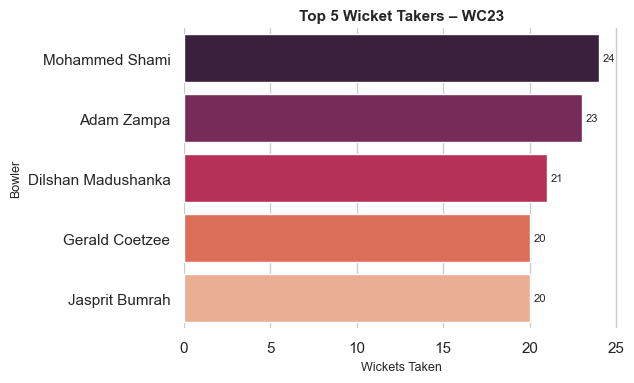

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
top_bowlers = (
    bowling_player
    .sort_values("wickets", ascending=False)
    .head(5)[["bowling", "matches", "wickets"]]
    .reset_index(drop=True)
)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(6.5, 4))   # 👈 small & neat

ax = sns.barplot(
    x="wickets",
    y="bowling",
    hue="bowling",      # future-proof (no warning)
    data=top_bowlers,
    palette="rocket",
    legend=False
)

# Titles and labels
ax.set_title(
    "Top 5 Wicket Takers – WC23",
    fontsize=11,
    weight="bold"
)
ax.set_xlabel("Wickets Taken", fontsize=9)
ax.set_ylabel("Bowler", fontsize=9)

# Value labels
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=8)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


In [8]:
bowling_player["economy"] = bowling_player["runs"] / bowling_player["overs"]


In [9]:
bowling_player.sort_values("economy").head(5)[
    ["bowling", "matches", "economy"]
]


,bowling,matches,economy
18,Jasprit Bumrah,11,4.076503
38,Mohammad Nabi,9,4.143556
22,Keshav Maharaj,10,4.157303
49,Ravindra Jadeja,11,4.284177
23,Kuldeep Yadav,11,4.458465


In [10]:
dot_balls = bowling.groupby("bowling")["zeroes"].sum().reset_index()
bowling_player = bowling_player.merge(dot_balls, on="bowling")


In [11]:
bowling_player.sort_values("zeroes", ascending=False).head(5)[
    ["bowling", "matches", "zeroes"]
]


,bowling,matches,zeroes
18,Jasprit Bumrah,11,372
19,Josh Hazlewood,11,334
22,Keshav Maharaj,10,321
57,Trent Boult,10,316
49,Ravindra Jadeja,11,315


In [12]:
dot_balls = bowling.groupby("bowling")["zeroes"].sum().reset_index()
bowling_player = bowling_player.merge(dot_balls, on="bowling", how="left")


In [13]:
bowling_player.columns


Index(['bowling', 'matches', 'overs', 'runs', 'wickets', 'maidens', 'wides',
       'no_balls', 'economy', 'zeroes_x', 'zeroes_y'],
      dtype='object')

In [14]:
bowling_player["zeroes"] = bowling_player["zeroes_y"]
bowling_player = bowling_player.drop(columns=["zeroes_x", "zeroes_y"])


In [15]:
bowling_player.columns


Index(['bowling', 'matches', 'overs', 'runs', 'wickets', 'maidens', 'wides',
       'no_balls', 'economy', 'zeroes'],
      dtype='object')

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features = ["wickets", "economy", "zeroes", "maidens", "no_balls", "wides"]

bowling_player[[f + "_n" for f in features]] = scaler.fit_transform(
    bowling_player[features]
)


In [17]:
bowling_player["personal_rating"] = (
    bowling_player["wickets_n"] * 0.30 +
    (1 - bowling_player["economy_n"]) * 0.20 +
    bowling_player["zeroes_n"] * 0.20 +
    bowling_player["maidens_n"] * 0.15 +
    (1 - bowling_player["no_balls_n"]) * 0.075 +
    (1 - bowling_player["wides_n"]) * 0.075
)


In [18]:
bowling_player.sort_values("personal_rating", ascending=False).head(5)[
    [
        "bowling",
        "matches",
        "wickets",
        "economy",
        "zeroes",
        "maidens",
        "no_balls",
        "wides",
        "personal_rating"
    ]
]


,bowling,matches,wickets,economy,zeroes,maidens,no_balls,wides,personal_rating
18,Jasprit Bumrah,11,20,4.076503,372,9,0,22,0.909756
19,Josh Hazlewood,11,16,4.822771,334,8,0,13,0.793803
49,Ravindra Jadeja,11,16,4.284177,315,4,2,2,0.737241
40,Mohammed Shami,7,24,5.298969,183,4,0,9,0.717497
35,Mitchell Santner,10,16,4.859307,276,4,0,5,0.705333


In [25]:
india_bowlers = bowling[bowling['bowling_team'] == 'India']['bowling'].unique()

top_indian_bowlers = (
    bowling_player
    .loc[bowling_player['bowling'].isin(india_bowlers)]
    .sort_values(by='personal_rating', ascending=False)
    .loc[:, [
        'bowling',
        'matches',
        'wickets',
        'economy',
        'zeroes',
        'maidens',
        'no_balls',
        'wides',
        'personal_rating'
    ]]
    .head(5)
)

top_indian_bowlers


,bowling,matches,wickets,economy,zeroes,maidens,no_balls,wides,personal_rating
18,Jasprit Bumrah,11,20,4.076503,372,9,0,22,0.909756
49,Ravindra Jadeja,11,16,4.284177,315,4,2,2,0.737241
40,Mohammed Shami,7,24,5.298969,183,4,0,9,0.717497
23,Kuldeep Yadav,11,15,4.458465,305,2,0,4,0.701727
41,Mohammed Siraj,11,14,5.698663,279,6,0,17,0.644829


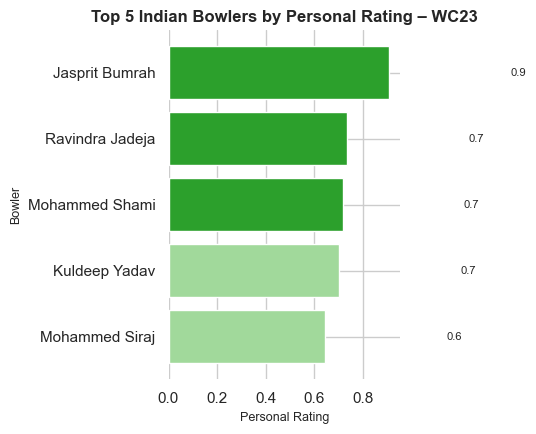

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare clean data
india_bowl_df = top_indian_bowlers[["bowling", "personal_rating"]].reset_index(drop=True)
india_bowl_df.columns = ["Bowler", "Personal_Rating"]

sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 4.5))   # small & neat

# Highlight top 3 bowlers
colors = ["#2ca02c" if i < 3 else "#a1d99b" for i in range(len(india_bowl_df))]

plt.barh(
    india_bowl_df["Bowler"],
    india_bowl_df["Personal_Rating"],
    color=colors
)

# Best performer on top
plt.gca().invert_yaxis()

# Titles & labels
plt.title(
    "Top 5 Indian Bowlers by Personal Rating – WC23",
    fontsize=12,
    weight="bold"
)
plt.xlabel("Personal Rating", fontsize=9)
plt.ylabel("Bowler", fontsize=9)

# Value labels
for i, value in enumerate(india_bowl_df["Personal_Rating"]):
    plt.text(value + 0.5, i, f"{value:.1f}", va="center", fontsize=8)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()
